In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
def validate_translation_sift(img1, img2):
    # 读取两张图像
    image1 = cv2.imread(img1, cv2.IMREAD_GRAYSCALE)
    image2 = cv2.imread(img2, cv2.IMREAD_GRAYSCALE)

    # 使用SIFT特征检测器
    sift = cv2.SIFT_create()

    # 寻找关键点和描述符
    keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
    keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

    # 使用FLANN匹配器
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params,search_params)
    matches = flann.knnMatch(descriptors1, descriptors2, k=2)

    # 应用比率测试，保留最佳匹配
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

    # 获取关键点的坐标
    points1 = np.float32([keypoints1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
    points2 = np.float32([keypoints2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

    # 计算仿射变换矩阵
    M, _ = cv2.estimateAffinePartial2D(points1, points2)

    # 判断是否为平移变换
    if M is not None:
        print("图像通过平移关系相关联。")
        print("平移矩阵 M:")
        print(M)
    else:
        print("图像不通过平移关系相关联。")

    # 可视化匹配结果
    img_matches = cv2.drawMatches(image1, keypoints1, image2, keypoints2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.imshow(img_matches)
    img = Image.fromarray(img_matches)
    img.show()

    plt.show()



图像通过平移关系相关联。
平移矩阵 M:
[[ 9.99945825e-01 -1.29535150e-05  2.21425837e-01]
 [ 1.29535150e-05  9.99945825e-01 -6.64052078e-02]]


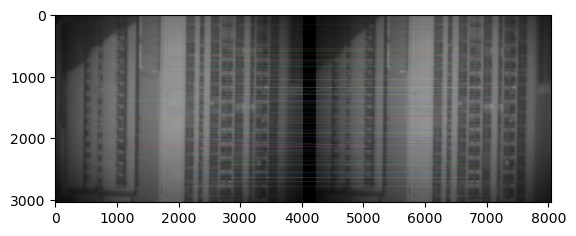

In [6]:
# 两张图像的文件路径
image_path1 = "origin_images/222.png"
image_path2 = "trans_image/transformed2to222.png"

# 调用验证函数
validate_translation_sift(image_path1, image_path2)
